<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/ml_intro/blob/main/2_planificacion/redes_neuronales_geron/pagina_308.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/ml_intro/blob/main/2_planificacion/redes_neuronales_geron/pagina_308.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>


## **El Perceptrón**  


El Perceptrón es una de las arquitecturas más simples de redes neuronales artificiales (RNA), inventado en 1957 por Frank Rosenblatt. 

<img src = 'https://news.cornell.edu/sites/default/files/styles/full_size/public/2019-09/0925_rosenblatt6.jpg?itok=rsC9rptw' width = 500>

Se basa en una neurona artificial ligeramente diferente (ver Figura 10-4) llamada **unidad de lógica de umbral (TLU)** o, en ocasiones, **unidad lineal de umbral (LTU)**. 

<img src = 'https://db0dce98.rocketcdn.me/es/files/2021/03/perceptron-formule.png'>

A diferencia de las neuronas binarias clásicas (activación "on/off"), en una TLU: 

 
- Las **entradas y salidas son números** (valores continuos).  
- Cada conexión de entrada tiene un **peso asociado** ($w_i$).  
- La TLU calcula una **suma ponderada** de las entradas:  
  $$
  z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n = \mathbf{x}^T \mathbf{w}
  $$  
  Luego aplica una **función escalón** (como Heaviside o signo) a $z$ para producir la salida:  
  $$
  h_{\mathbf{w}}(\mathbf{x}) = \text{step}(z).
  $$



#### **Funciones Escalón Comunes**  
- **Función de Heaviside**:  
  $$
  \text{heaviside}(z) = \begin{cases}
  0 & \text{si } z < 0 \\
  1 & \text{si } z \geq 0
  \end{cases}
  $$  


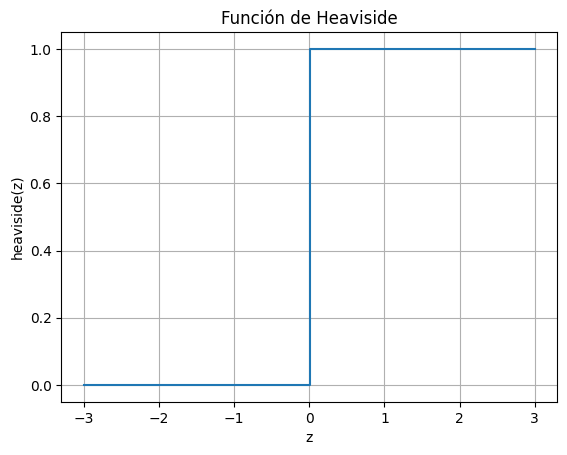

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
z = np.linspace(-3, 3, 200)
def heaviside(z):
    return np.where(z < 0, 0, 1)
h = heaviside(z)
plt.step(z, h, where='post')
plt.title('Función de Heaviside')
plt.xlabel('z')
plt.ylabel('heaviside(z)')
plt.grid(True)
plt.show()

- **Función signo**:  
  $$
  \text{sgn}(z) = \begin{cases}
  -1 & \text{si } z < 0 \\
  0 & \text{si } z = 0 \\
  +1 & \text{si } z > 0
  \end{cases}
  $$


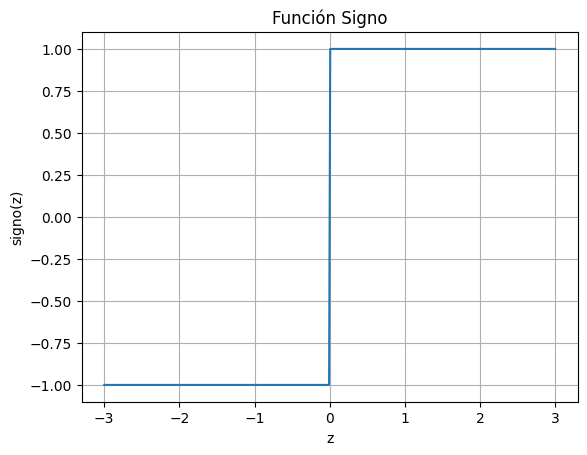

In [9]:
# Grafica de la finción signo
import numpy as np 
import matplotlib.pyplot as plt 

z = np.linspace(-3, 3, 400)
def signo(z):
    return np.where(z < 0, -1, np.where(z > 0, 1, 0))
signo_z= signo(z)
plt.plot(z, signo_z, label='signo(z)')
plt.title('Función Signo')
plt.xlabel('z')
plt.ylabel('signo(z)')
plt.grid(True)
plt.savefig(r"C:\Users\marco\Downloads\funcion_signo.png")

In [7]:
signo(7)

array(1)


#### **Aplicaciones de una TLU**  
- **Clasificación binaria lineal**: Similar a una Regresión Logística o SVM lineal.  
  - Ejemplo: Clasificar flores iris usando longitud y ancho del pétalo, con un **término de sesgo** ($x_0 = 1$).  
  - Entrenar una TLU implica encontrar los pesos óptimos ($w_0, w_1, w_2$).


Perfecto, aquí tienes un ejemplo completo en Python que muestra cómo entrenar y visualizar una **Unidad Lineal Umbral (TLU)** para una tarea de **clasificación binaria lineal** con el conjunto de datos *Iris*. Usaremos solo dos clases y dos características para mantener la visualización en 2D.

---

### 🌸 **Clasificación binaria con una TLU sobre el dataset Iris**

#### 💡 TLU = Threshold Logic Unit (Unidad Lineal Umbral)


C:\Users\marco\AppData\Local\Temp\ipykernel_10276\4205887432.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == class_value, 0],


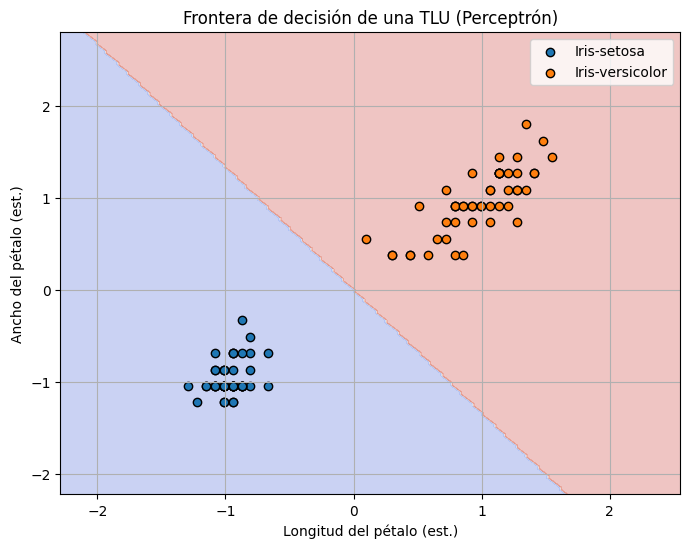

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

# 1. Cargar y filtrar el dataset Iris (solo dos clases y dos características)
iris = load_iris()
X = iris.data[:, [2, 3]]  # Longitud y ancho del pétalo
y = iris.target

# Solo usar dos clases: Iris-setosa (0) e Iris-versicolor (1)
binary_filter = y < 2
X = X[binary_filter]
y = y[binary_filter]

# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 2. Entrenar una TLU (Perceptrón simple)
tlu = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
tlu.fit(X_std, y)

# 3. Función para graficar la frontera de decisión
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Separar por clase y añadir etiquetas
    for class_value, class_label in zip([0, 1], ['Iris-setosa', 'Iris-versicolor']):
        plt.scatter(X[y == class_value, 0],
                    X[y == class_value, 1],
                    label=class_label,
                    edgecolors='k',
                    cmap='coolwarm')

    plt.xlabel('Longitud del pétalo (est.)')
    plt.ylabel('Ancho del pétalo (est.)')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

# 4. Visualización
plot_decision_boundary(X_std, y, tlu, "Frontera de decisión de una TLU (Perceptrón)")



---

### ✅ ¿Qué muestra este código?

* **Entrenamos una TLU** usando `Perceptron`, que implementa un clasificador lineal con activación escalón.
* Separamos dos clases del conjunto *Iris* en el plano definido por las variables "longitud" y "ancho" del pétalo.
* Visualizamos la **frontera de decisión** aprendida por la TLU.

¿Deseas que te lo convierta a un notebook Jupyter con celdas y explicaciones didácticas?



#### **Estructura del Perceptrón**  
- Compuesto por una **capa densa (fully connected)** de TLUs, donde cada neurona está conectada a todas las entradas.  
- Las **neuronas de entrada** son passthrough (transmiten el valor sin modificación).  
- Se agrega una **neurona de sesgo** ($x_0 = 1$) para ajustar el umbral.  
- **Salida múltiple**: Un Perceptrón con 2 entradas y 3 TLUs puede clasificar en 3 clases binarias simultáneamente.



#### **Cálculo Vectorizado (Álgebra Lineal)**  
La salida de una capa se calcula eficientemente con:  
$$
h_{W,b}(\mathbf{X}) = \phi(\mathbf{X} \mathbf{W} + \mathbf{b})
$$  
- $\mathbf{X}$: Matriz de características (instancias × características).  
- $\mathbf{W}$: Matriz de pesos (características × neuronas).  
- $\mathbf{b}$: Vector de sesgo.  
- $\phi$: Función de activación (ej. escalón para TLUs).



#### **Entrenamiento del Perceptrón**  
- Inspirado en la **Regla de Hebb**:  
  > *"Las neuronas que se activan juntas, se conectan juntas."*  
- **Regla de aprendizaje de Rosenblatt**: Ajusta los pesos para reducir el error:  
  $$
  w_{i,j}^{\text{(nuevo)}} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
  $$  
  - $\eta$: Tasa de aprendizaje.  
  - $y_j$: Valor objetivo, $\hat{y}_j$: Predicción.  
- **Teorema de convergencia**: Si los datos son linealmente separables, el Perceptrón encuentra una solución.



#### **Limitaciones**  
- **No puede resolver problemas no lineales** (ej. XOR).  
- Críticas de Minsky y Papert (1969): Llevaron al abandono temporal de las RNA en favor de métodos simbólicos.  



#### **Multi-Layer Perceptron (MLP)**  


- **Solución a las limitaciones**: Apilar múltiples capas de Perceptrones.  
- **Ejemplo XOR**: Un MLP con una capa oculta resuelve el problema (ver Figura 10-6).  
  - Pesos manuales: Conexiones específicas con pesos 1 y -1.  
  - Salida:  
    - $(0,0)$ o $(1,1)$ → $0$.  
    - $(0,1)$ o $(1,0)$ → $1$.  



#### **Implementación en Scikit-Learn**  


In [2]:

import numpy as np
from sklearn.linear_model import Perceptron
per_clf = Perceptron()
X = np.array([(0,1), (1,0), (1,1), (0,0)])
y = np.array([1, 1, 0, 0])

per_clf.fit(X, y)  # Equivalente a SGDClassifier con pérdida "perceptron".


,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


  
- **Diferencias con Regresión Logística**:  
  - El Perceptrón usa un umbral rígido (no probabilidades).  
  - Menos flexible en problemas no lineales.





### **Diseño de Práctica en Python**  
**Objetivo**: Implementar un Perceptrón desde cero y un MLP para resolver XOR.  



#### **1. TLU con Heaviside**  


In [ ]:
```python
import numpy as np

def heaviside(z):
    return np.where(z >= 0, 1, 0)

class TLU:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return heaviside(z)
```



#### **2. Perceptrón (Entrenamiento)**  


In [ ]:
```python
class Perceptron:
    def __init__(self, input_size, lr=0.1):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.lr = lr
    
    def fit(self, X, y, epochs=100):
        for _ in range(epochs):
            for xi, yi in zip(X, y):
                y_pred = heaviside(np.dot(xi, self.weights) + self.bias)
                error = yi - y_pred
                self.weights += self.lr * error * xi
                self.bias += self.lr * error
    
    def predict(self, X):
        return heaviside(np.dot(X, self.weights) + self.bias)
```



#### **3. MLP para XOR**  


```python
def mlp_xor(X):
    # Capa oculta
    hidden = heaviside(np.dot(X, np.array([[1, -1], [-1, 1]])) + np.array([0, 0]))
    # Capa de salida
    return heaviside(np.dot(hidden, np.array([1, 1])) - 1.5)

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print("MLP XOR:", mlp_xor(X_xor))  # Salida: [0, 1, 1, 0]
```



#### **4. Comparación con Scikit-Learn**  


```python
from sklearn.linear_model import Perceptron
per_clf = Perceptron()
per_clf.fit(X_xor, [0, 1, 1, 0])
print("Scikit-Learn (XOR):", per_clf.predict(X_xor))  # Falla en XOR
```



**Conclusión**:  
- El Perceptrón simple es útil para problemas lineales.  
- Los MLP (con backpropagation) superan sus limitaciones.  
- Próximo paso: Implementar backpropagation para entrenar MLPs automáticamente.

**El Perceptrón**  
El Perceptrón es una de las arquitecturas más simples de redes neuronales artificiales (RNA), inventada en 1957 por Frank Rosenblatt. Se basa en una neurona artificial ligeramente diferente (ver Figura 10-4) llamada **unidad de lógica de umbral (TLU)** o, a veces, **unidad lineal de umbral (LTU)**:  
- Las entradas y salidas son números (en lugar de valores binarios "on/off"). 

 
- Cada conexión de entrada tiene un **peso asociado**.  
- La TLU calcula una **suma ponderada** de sus entradas:  
  $$
  z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n = \mathbf{x}^T \mathbf{w}
  $$  
  Luego aplica una **función escalón** a esta suma y devuelve el resultado:  
  $$
  h_{\mathbf{w}}(\mathbf{x}) = \text{step}(z)
  $$



# **Funciones escalón comunes**: 

 
- **Función de Heaviside**:  
  $$
  \text{heaviside}(z) = \begin{cases}
  0 & \text{si } z < 0 \\
  1 & \text{si } z \geq 0
  \end{cases}
  $$  
- **Función signo**:  
  $$
  \text{sgn}(z) = \begin{cases}
  -1 & \text{si } z < 0 \\
  0 & \text{si } z = 0 \\
  +1 & \text{si } z > 0
  \end{cases}
  $$



**Aplicación**:  
- Una sola TLU puede realizar **clasificación binaria lineal** (similar a Regresión Logística o SVM lineal).  
- Ejemplo: Clasificar flores iris basándose en longitud y ancho del pétalo, usando un sesgo ($x_0 = 1$).



**Perceptrón multicapa**:  
- Un Perceptrón es una **capa densa (fully connected)** de TLUs, donde cada neurona está conectada a todas las entradas.  
- Se entrena con una variante de la **Regla de Hebb**: ajusta los pesos para reducir el error en las predicciones (ver Ecuación 10-3).  
- **Limitación**: No puede resolver problemas no lineales (como XOR), pero un **MLP (Multi-Layer Perceptron)** sí puede.





### **Diseño de Práctica de Codificación en Python**



#### **Objetivo**:  
Implementar un Perceptrón desde cero para clasificación binaria, usando la función de Heaviside, y aplicarlo al problema de XOR con un MLP.





#### **Ejercicio 1: Implementar una TLU (Threshold Logic Unit)**


In [4]:

import numpy as np

def heaviside(z):
    return np.where(z >= 0, 1, 0)  # Función de Heaviside

class TLU:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return heaviside(z)




**Prueba**:  


In [11]:

tlu = TLU(2)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print("Predicciones TLU aleatorias:", tlu.predict(X))



Predicciones TLU aleatorias: [1 1 1 1]



---

#### **Ejercicio 2: Entrenar un Perceptrón (Regla de Rosenblatt)**


In [10]:

class Perceptron:
    def __init__(self, input_size, lr=0.1):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.lr = lr  # Tasa de aprendizaje
    
    def fit(self, X, y, epochs=100):
        for _ in range(epochs):
            for xi, yi in zip(X, y):
                y_pred = heaviside(np.dot(xi, self.weights) + self.bias)
                error = yi - y_pred
                self.weights += self.lr * error * xi
                self.bias += self.lr * error
    
    def predict(self, X):
        return heaviside(np.dot(X, self.weights) + self.bias)




**Prueba con OR**:  


In [9]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])  # OR
p = Perceptron()
p.fit(X, y)
print("Predicciones OR:", p.predict(X))




Predicciones OR: [0 1 1 1]




#### **Ejercicio 3: Resolver XOR con un MLP (2 capas)**


In [ ]:

# Capa 1: 2 TLUs (entrada -> oculta)
weights1 = np.array([[1, -1], [-1, 1]])  # Pesos manuales para XOR
bias1 = np.array([0, 0])

# Capa 2: 1 TLU (oculta -> salida)
weights2 = np.array([1, 1]])
bias2 = -1

def mlp_xor(X):
    hidden = heaviside(np.dot(X, weights1) + bias1)
    return heaviside(np.dot(hidden, weights2.T) + bias2)

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print("Predicciones XOR:", mlp_xor(X_xor))  # Debe devolver [0, 1, 1, 0]






#### **Ejercicio 4: Comparar con Scikit-Learn**


In [7]:

from sklearn.linear_model import Perceptron

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
# Perceptrón de una capa (falla en XOR)
sk_p = Perceptron()
sk_p.fit(X_xor, np.array([0, 1, 1, 0]))
print("Scikit-Learn (XOR):", sk_p.predict(X_xor))  # No resuelve XOR




Scikit-Learn (XOR): [0 0 0 0]




### **Conclusión**:  
- El Perceptrón simple es efectivo para problemas linealmente separables.  
- Para problemas no lineales (como XOR), se necesita un **MLP** con al menos una capa oculta.  
- La práctica cubre desde la implementación básica hasta la combinación de capas.  

**Extensión**: Modificar el MLP para usar aprendizaje automático (backpropagation) en lugar de pesos fijos.

# Apéndice sobre la función np.where() de NumPy 

La función **`np.where()`** de NumPy es una herramienta versátil para realizar **operaciones condicionales** en arreglos de manera eficiente. Se comporta como una versión vectorizada del operador ternario `if-else`, pero con capacidades avanzadas para trabajar con arrays multidimensionales. Aquí te explico sus usos principales:

---



### **📌 Sintaxis Básica**


In [4]:

import numpy as np
np.where(condición, [valor_si_verdadero, valor_si_falso])



NameError: name 'condición' is not defined

- **`condición`**: Expresión booleana (ej: `arr > 5`).
- **`valor_si_verdadero`**: Valor a asignar donde la condición es `True` (opcional).
- **`valor_si_falso`**: Valor a asignar donde la condición es `False` (opcional).

---



### **🔍 3 Usos Principales**



#### **1. Reemplazo Condicional (Ternario Vectorizado)**


In [5]:

arr = np.array([1, 5, 10, 15])
resultado = np.where(arr > 5, "mayor", "menor")
print(resultado)  # Output: ['menor', 'menor', 'mayor', 'mayor']



['menor' 'menor' 'mayor' 'mayor']



#### **2. Índices de Elementos que Cumplen una Condición**  
Si omites los valores de reemplazo, devuelve las **coordenadas** de los elementos `True`:


In [8]:

arr = np.array([[1, 2], [3, 4]])
filas, columnas = np.where(arr > 2)
print(filas)    # Output: [1, 1]
print(columnas) # Output: [0, 1]



[1 1]
[0 1]


In [9]:
arr 

array([[1, 2],
       [3, 4]])


#### **3. Filtrado Avanzado**  
Combínalo con indexación para extraer valores:


In [11]:

arr = np.array([10, 20, 30, 40])
indices = np.where(arr > 20)
print(arr[indices])  # Output: [30, 40]



[30 40]


In [12]:
indices 

(array([2, 3]),)


---

### **🎯 Casos de Uso en Ciencia de Datos**



#### **Ejemplo 1: Limpieza de Datos**


In [13]:

datos = np.array([1, -999, 3, -999, 5])  # -999 es valor faltante
datos_limpios = np.where(datos == -999, 0, datos)
print(datos_limpios)  # Output: [1, 0, 3, 0, 5]



[1 0 3 0 5]



#### **Ejemplo 2: Clasificación Binaria**


In [15]:

scores = np.array([0.2, 0.8, 0.5])
clases = np.where(scores > 0.5, 1, 0)
print(clases)  # Output: [0, 1, 0]



[0 1 0]



#### **Ejemplo 3: Máscaras en Imágenes**


In [16]:

imagen = np.random.randint(0, 256, (100, 100))  # Matriz 100x100
imagen_umbral = np.where(imagen > 128, 255, 0)  # Binarización



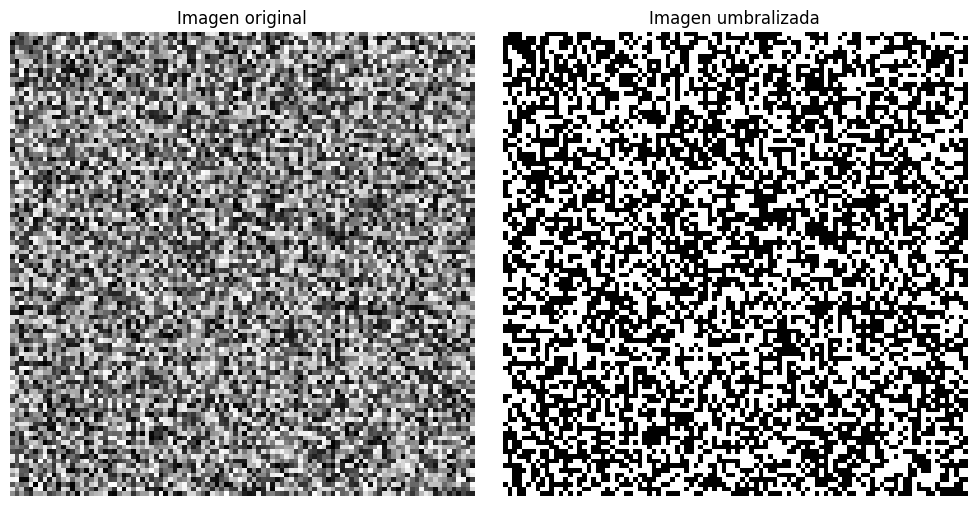

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(imagen, cmap='gray')
axs[0].set_title('Imagen original')
axs[0].axis('off')

axs[1].imshow(imagen_umbral, cmap='gray')
axs[1].set_title('Imagen umbralizada')
axs[1].axis('off')

plt.tight_layout()
plt.savefig(r'C:/Users/marco/Downloads/imagen_umbralizada.png')
plt.show()


---

### **⚡ Rendimiento vs. Alternativas**
- **Ventaja:** Es **mucho más rápido** que bucles `for` o `list comprehensions` en arrays grandes.
- **Alternativa:** Para condiciones complejas, considera `np.select()` o `np.piecewise()`.

---

### **💡 Tips Avanzados**
1. **Condiciones Múltiples** (usa operadores bitwise):


In [19]:
arr = np.array([1, 2, 3, 4])
resultado = np.where((arr > 1) & (arr < 4), "ok", "no")
resultado 


array(['no', 'ok', 'ok', 'no'], dtype='<U2')

2. **Operar con Otros Arrays**:


In [20]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.where(a > 1, a * 2, b)  # Output: [4, 4, 6]



array([4, 4, 6])


---

### **📌 Limitaciones**
- No es óptimo para condiciones **anidadas complejas** (mejor usar `np.select` en esos casos).
- Siempre devuelve un **array**, incluso si hay un solo elemento.

---



Con `np.where()`, puedes escribir código conciso y eficiente para manipular datos basados en condiciones. Es una función clave para cualquier flujo de trabajo en análisis numérico con Python. 